In [ ]:
import requests
url = 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
r = requests.get(url, allow_redirects=True)
open('nature_12K.zip', 'wb').write(r.content)
!wget 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
!unzip nature_12K.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [ ]:
!pip install wandb
import wandb
wandb.init(project="CS6910_Assignment2", entity="swe-rana")
from wandb.keras import WandbCallback

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
     |████████████████████████████████| 181 kB 44.5 MB/s 
     |████████████████████████████████| 144 kB 44.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8f0b18f94cba702d48c3b3337079091fd167b5bbf6ed99e4a12ac2e8f2b45720
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# import the necessary packages
import pandas as pd
import os
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def data(image_size,augment_data,batch_size):
      home_path = "/content/inaturalist_12K"  # initialize the path to the *original* input directory of images
      # derive the paths to the training, validation, and testing
      train_path = os.path.join(home_path,'train')
      test_path = os.path.join(home_path,'val')
      if augment_data == True:# initialize the training data augmentation object
        train_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2],validation_split=0.1) # brightness
        test_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2]) # brightness

      else:
        train_data = ImageDataGenerator(rescale=1./255, validation_split=0.1)# initialize the training generator
        test_data = ImageDataGenerator(rescale=1./255)# initialize the test generator

      #flow_from_directory() to read the images from a big numpy array and folders containing images
      train_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "training")
      val_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "validation")
      test_generator = test_data.flow_from_directory(directory= test_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical")
      return train_generator,val_generator,test_generator

def CNN_model(image_size,kernel_size,num_filters,filter_org,dropout,batch_norm,epochs,dense_size,lr):
  #filter organisation
            if filter_org == "same":
                filters = [num_filters,num_filters,num_filters,num_filters,num_filters]
            if filter_org == "doubling": 
                filters = [num_filters,num_filters*2,num_filters*4,num_filters*8,num_filters*16]
            if filter_org == "halving":
                filters = [num_filters,int(num_filters/2),int(num_filters/4),int(num_filters/8),int(num_filters/16)]
            #initialising sequential model
            nature_model = Sequential()
            #First convolution layer
            nature_model.add(Conv2D(filters[0], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))  #Activation layer Applies an activation function to an output.
            if batch_norm == True:
                          nature_model.add(BatchNormalization()) # Batch normalisation standardize the inputs to a layer
            nature_model.add(MaxPooling2D(2, 2)) #pooling Layer to downsample the input image
            #Second convolution layer
            nature_model.add(Conv2D(filters[1], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu')) #Activation layer
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  #pooling Layer

            #Third convolution layer
            nature_model.add(Conv2D(filters[2], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu')) #Activation layer
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  #pooling Layer
            #Fourth convolution layer
            nature_model.add(Conv2D(filters[3], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu')) #Activation layer

            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2)) #pooling Layer
            #Fifth convolution layer
            nature_model.add(Conv2D(filters[4], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))  #Activation layer
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))          #pooling Layer   
            nature_model.add(Flatten()) #Flattens the input
            nature_model.add(Dense(dense_size, activation='relu')) #Fully Connected layer
            nature_model.add(Dropout(dropout)) #Dropout Layer avoid overfitting

            
            nature_model.add(Dense(10, activation='softmax')) #output layer
            return nature_model


In [ ]:
train_gen, val_gen, test_gen = data(image_size=200,augment_data=False,batch_size=200) #generating train,test and val data
model = CNN_model(image_size=200,kernel_size=3,num_filters=64, filter_org="same",dropout=0.3, batch_norm=False,epochs=20,dense_size=64,lr=0.001)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy") #complie our model
model.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[WandbCallback()]) #Ftiting our model into the train and val data
model.summary()
model.save("my_best_model_A.h5")

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/20
45/45 [==============================] - 129s 3s/step - loss: 2.2809 - categorical_accuracy: 0.1243 - val_loss: 2.2308 - val_categorical_accuracy: 0.1582 - _timestamp: 1648881545.0000 - _runtime: 1288.0000
Epoch 2/20
45/45 [==============================] - 125s 3s/step - loss: 2.1898 - categorical_accuracy: 0.1953 - val_loss: 2.1524 - val_categorical_accuracy: 0.2162 - _timestamp: 1648881670.0000 - _runtime: 1413.0000
Epoch 3/20
45/45 [==============================] - 125s 3s/step - loss: 2.1019 - categorical_accuracy: 0.2387 - val_loss: 2.0950 - val_categorical_accuracy: 0.2382 - _timestamp: 1648881794.0000 - _runtime: 1537.0000
Epoch 4/20
45/45 [==============================] - 124s 3s/step - loss: 2.0548 - categorical_accuracy: 0.2593 - val_loss: 2.0382 - val_categorical_accuracy: 0.2853 - _timestamp: 1648881919.0000 - _runtime: 1662.0000
Epoc

In [ ]:
home_path = "/content/inaturalist_12K"
test_path = os.path.join(home_path,'val')
model = tf.keras.models.load_model("/content/my_best_model_A.h5")
test_data = ImageDataGenerator(rescale=1./255)
test_gen = test_data.flow_from_directory(directory= test_path,target_size=(200,200), batch_size=200,color_mode="rgb",class_mode="categorical")



In [ ]:
score = model.evaluate(test_gen,batch_size=100)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
Test_accuracy = {"loss":score[0],"Test_accuracy":score[1]}
wandb.init(entity='swe-rana',project='CS6910_Assignment2')
wandb.log(Test_accuracy)
predictions = model(test_gen[0][0])

10/10 [==============================] - 41s 4s/step - loss: 1.8117 - categorical_accuracy: 0.3815
Test loss: 1.81171715259552
Test accuracy: 0.3815000057220459


categorical_accuracy,▁▃▄▄▅▅▅▁▃▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇██
epoch,▁▁▂▂▂▃▃▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▇▆▆▅▅▅█▇▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▁▁
val_categorical_accuracy,▂▄▅▆▆▆▆▁▃▄▆▅▆▆▇▇▇▇▇█▇██▇██▇
val_loss,█▆▅▄▄▃▃█▆▅▄▄▃▄▃▂▃▂▂▁▁▁▁▂▂▁▂
best_epoch,15
best_val_loss,1.87227
categorical_accuracy,0.43122
epoch,19
loss,1.59773
val_categorical_accuracy,0.33133


Test_accuracy,▁
loss,▁
Test_accuracy,0.3815
loss,1.81172


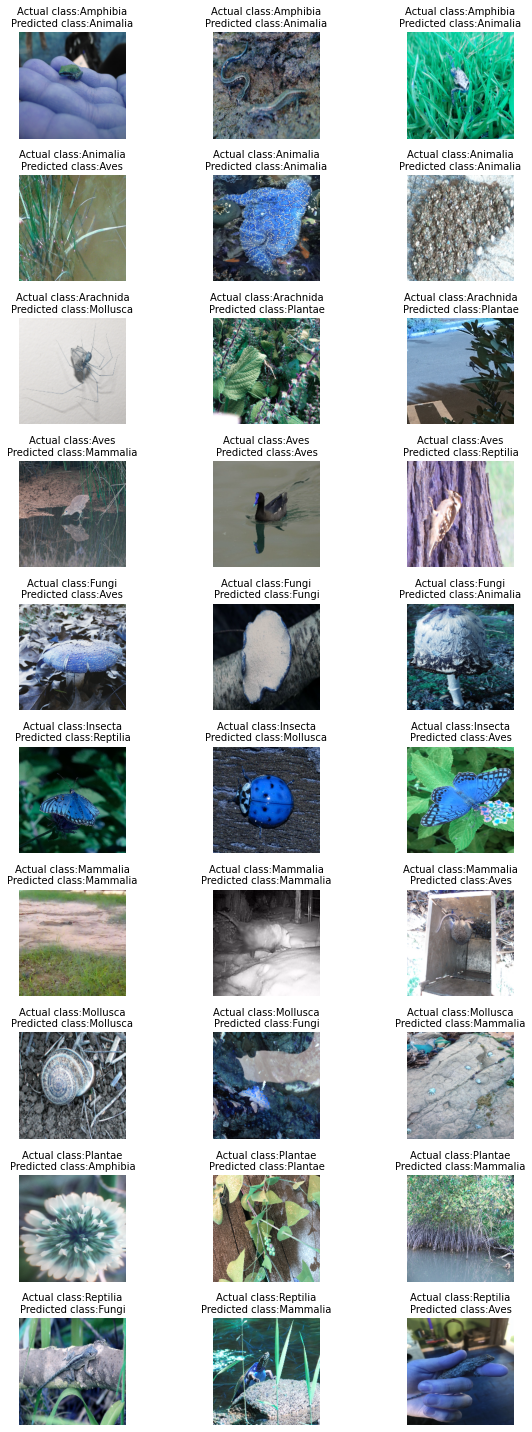

In [ ]:
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
test_path = "/content/inaturalist_12K/val"
im_1,im_2,predictions=[],[],[]
for label in classes:
    i=0
    path=os.path.join(test_path,label)
    for img in os.listdir(path):
      if i==3:
        break
      try:
        image = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        im_1.append(image)
        im_2.append(label)
        imag = cv2.resize(image, (200,200)) / 255.0
        prediction = model.predict(imag.reshape(1,200, 200,3))
        c=prediction.argmax()
        predictions.append(classes[c])
        i+=1
      except:
        break

#plotting a 10x3 grid with predictions
fig = plt.figure(figsize=(10,20))
rows,columns=10,3
i=1
for k in range(30):

  img=cv2.resize(im_1[k],(200,200))
  fig.add_subplot(rows,columns,i)
  plt.imshow(img)
  plt.title('Actual class:'+im_2[k]+  "\n" +'Predicted class:'+predictions[k],fontdict={'fontsize':10})
  plt.axis("off")
  plt.tight_layout()
  #plt.axis('off')
  i+=1   
wandb.init(entity='swe-rana',project='CS6910_Assignment2')
wandb.log({'predicting on sample images':plt})

In [ ]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output)
image, label = test_gen.next()

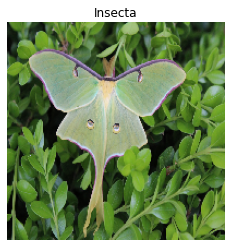

In [ ]:
lab = label.argmax()
labels=classes[lab]
plt.imshow(image[0])
plt.axis("off")
plt.title(labels)
plt.show()

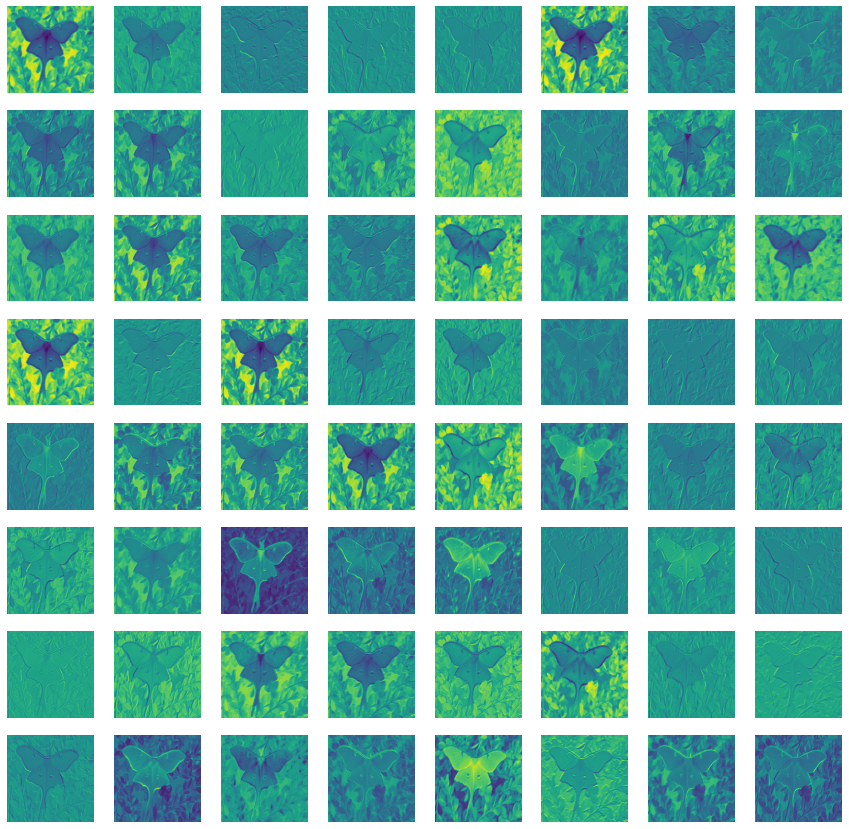

In [ ]:
feature_maps = partial_model.predict(image)

plt.figure(figsize=(15, 15))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0,:,:,i])
    plt.axis("off")

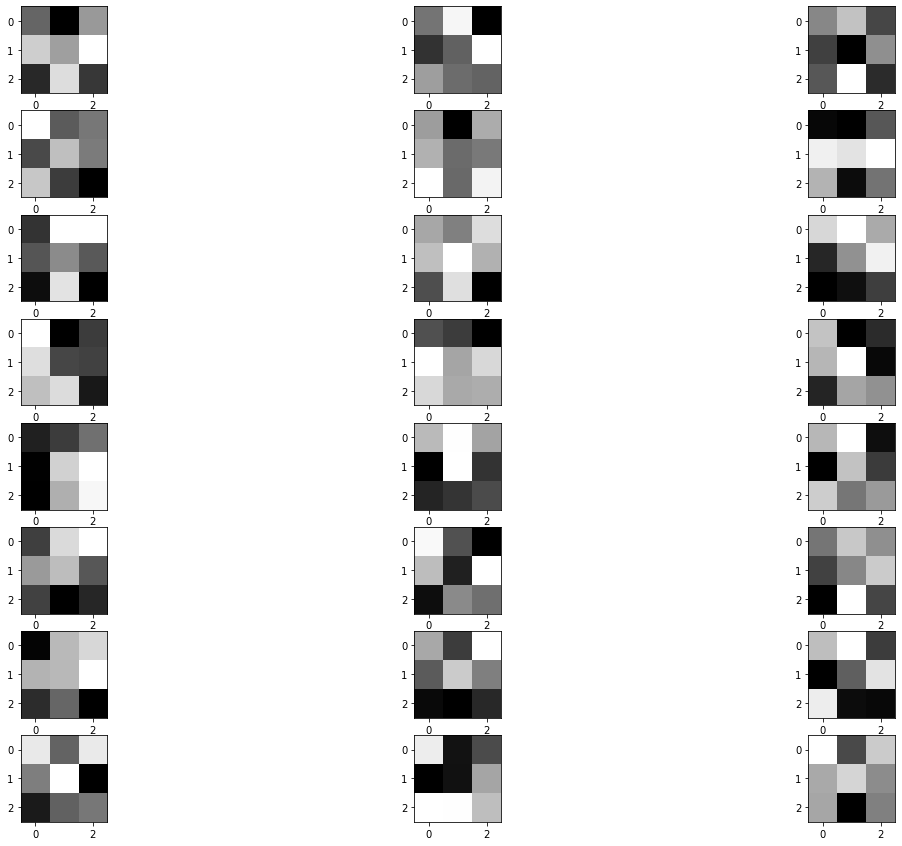

In [ ]:
#We will be visualising 6 filters out of 64 filters from 1st layer
#Iterate thru all the layers of the model
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters =8
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()